<a href="https://colab.research.google.com/github/ram-kumar/classes.github.io/blob/master/Copy_of_M1_NB_MiniProject_1_Employee_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Mini Project Notebook: Employee Attrition Prediction

## Problem Statement

To predict employee attrition using CatBoost and XgBoost

## Learning Objectives

At the end of the experiment, you will be able to

* explore the employee attrition dataset
* apply CatBoost and XgBoost on the dataset
* tune the model hyperparameters to improve accuracy
* evaluate the model using suitable metrics


## Introduction

Employee attrition is the gradual reduction in employee numbers. Employee attrition happens when the size of your workforce diminishes over time. This means that employees are leaving faster than they are hired. Employee attrition happens when employees retire, resign, or simply aren't replaced.
Although employee attrition can be company-wide, it may also be confined to specific parts of a business.

Employee attrition can happen for several reasons. These include unhappiness about employee benefits or the pay structure, a lack of employee development opportunities, and even poor conditions in the workplace.

To know more about the factors that lead to employee attrition, refer [here](https://www.betterup.com/blog/employee-attrition#:~:text=Employee%20attrition%20is%20the%20gradual,or%20simply%20aren't%20replaced).


**Gradient Boosted Decision Trees**

* Gradient boosted decision trees (GBDTs) are one of the most important machine learning models.

* GBDTs originate from AdaBoost, an algorithm that ensembles weak learners and uses the majority vote, weighted by their individual accuracy, to solve binary classification problems. The weak learners in this case are decision trees with a single split, called decision stumps.

* Some of the widely used gradient boosted decision trees are XgBoost, CatBoost and LightGBM.

## Dataset

The dataset used for this mini-project is [HR Employee Attrition dataset](https://data.world/aaizemberg/hr-employee-attrition). This dataset is synthetically created by IBM data scientists. There are 35 features and 1470 records.

There are numerical features such as:

* Age
* DistanceFromHome
* EmployeeNumber
* PerformanceRating

There are several categorical features such as:
* JobRole
* EducationField
* Department
* BusinessTravel

Dependent or target feature is 'attrition' which has values as Yes/No.

In [2]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/wa_fn_usec_hr_employee_attrition_tsv.csv
print("Data Downloaded Successfuly!!")

Data Downloaded Successfuly!!


## Grading = 10 Points

### Install CatBoost

In [3]:
!pip -qq install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.4 MB/s eta 0:00:00


### Import Required Packages

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, metrics
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 100)
%matplotlib inline

Please refer to the [ReadMe](https://drive.google.com/file/d/1g5xxfPbAj2sCdIt1oyfarJFDd_u1UwsK/view?usp=sharing) before proceeding further.

# Part-A

## Load the Dataset

**Exercise 1: Read the dataset [0.5 Mark]**

**Hint:** pd.read_csv()

In [5]:
# read the dataset
# YOUR CODE HERE
df = pd.read_csv("/content/wa_fn_usec_hr_employee_attrition_tsv.csv")

In [6]:
# Check the shape of dataframe.
# YOUR CODE HERE
df.shape

(1470, 35)

There can be more than one file to read as this is introduced as a competition, dataset has one file for training the model. Their can be other files as one containing the test features and the other can be the true labels.

## Data Exploration

- Check for missing values
- Check for consistent data type across a feature
- Check for outliers or inconsistencies in data columns
- Check for correlated features
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships? Making correlation heatmaps makes it easy to identify possible collinearity

**Exercise 2: Create a `List` of numerical and categorical columns. Display a statistical description of the dataset. Remove missing values (if any) [0.5 Mark]**

**Hint:** Use `for` to iterate through each column.

First, we want to get a sense of our data:
- What features have the most divergent distributions based on target class
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships, making correlation heatmaps makes it easy to identify possible colinearity

In [7]:
# YOUR CODE HERE
df = df.dropna()
df.shape

(1470, 35)

In [8]:
cat, num = [], []

for col in df.columns:
  series = df[col]
  series = series.dropna()
  if series.dtype == 'object':
    cat.append(col)
  else:
    num.append(col)

print('categorical: ', cat)
print('numerical: ', num)

print('categorical columns')
for col in cat:
  print(col)
  series = df[col]
  series = series.dropna()
  print(series.value_counts())


print('numerical columns')
for col in num:
  series = df[col]
  series = series.dropna()
  print(series.describe())

categorical:  ['attrition', 'businesstravel', 'department', 'educationfield', 'gender', 'jobrole', 'maritalstatus', 'over18', 'overtime']
numerical:  ['age', 'dailyrate', 'distancefromhome', 'education', 'employeecount', 'employeenumber', 'environmentsatisfaction', 'hourlyrate', 'jobinvolvement', 'joblevel', 'jobsatisfaction', 'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'percentsalaryhike', 'performancerating', 'relationshipsatisfaction', 'standardhours', 'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']
categorical columns
attrition
No     1233
Yes     237
Name: attrition, dtype: int64
businesstravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: businesstravel, dtype: int64
department
Research & Development    961
Sales                     446
Human Resources            63
Name: department, dtype: int64
educationf

### Check for outliers

**Exercise 3: Create a box plot to check for outliers [0.5 Mark]**

<Axes: >

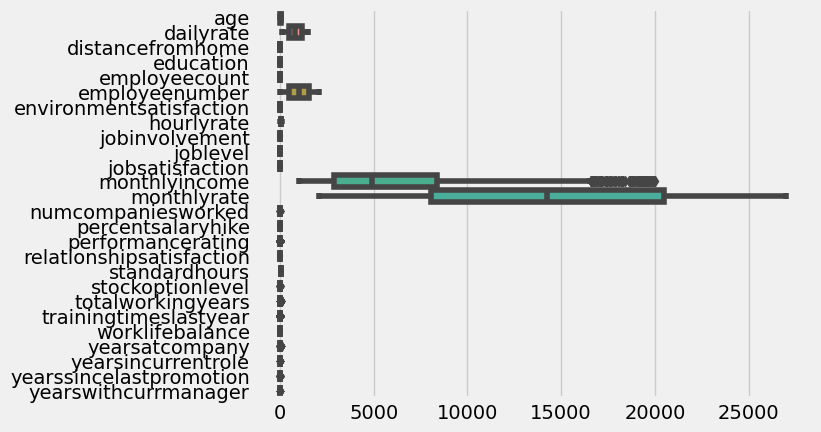

In [9]:
# Check for outliers
# YOUR CODE HERE
sns.boxplot(df, orient='h')

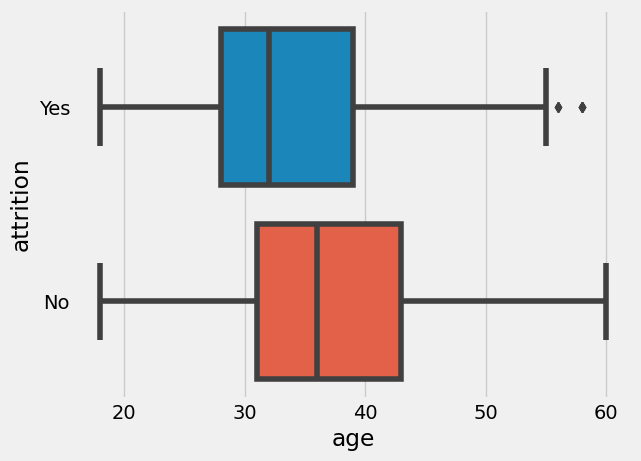

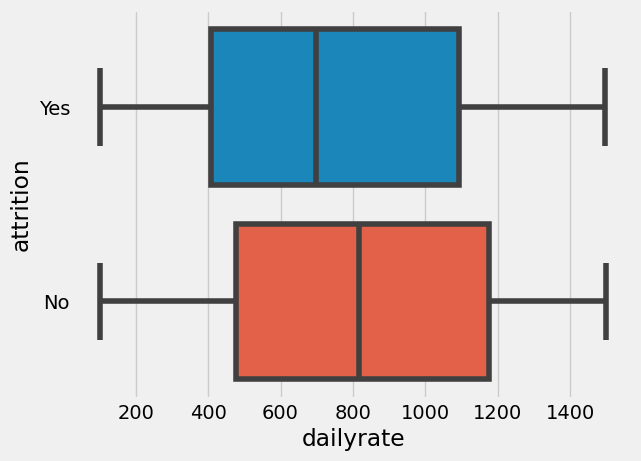

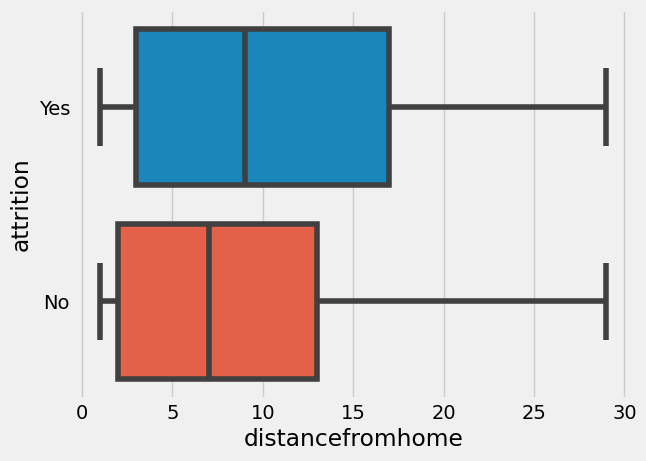

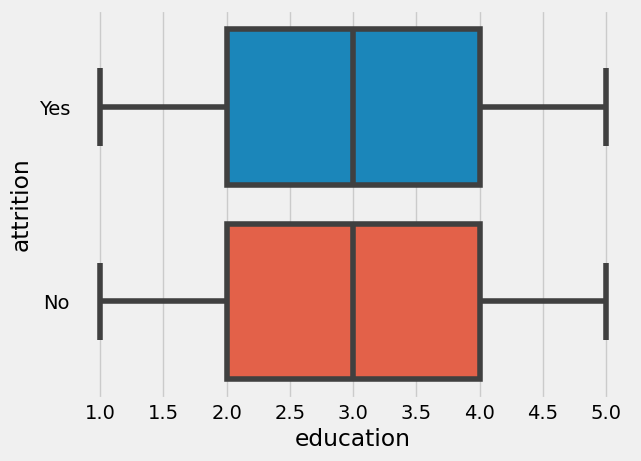

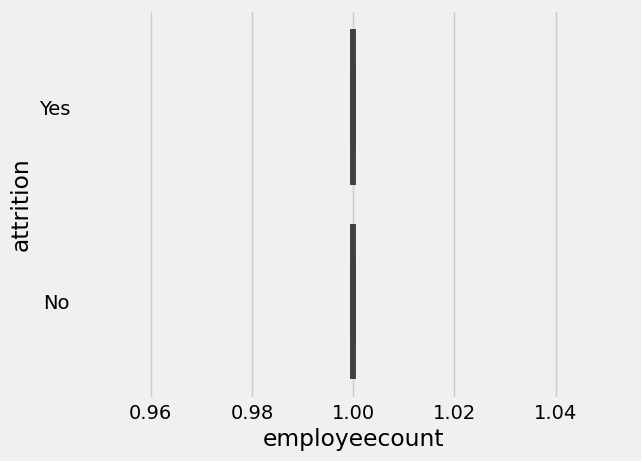

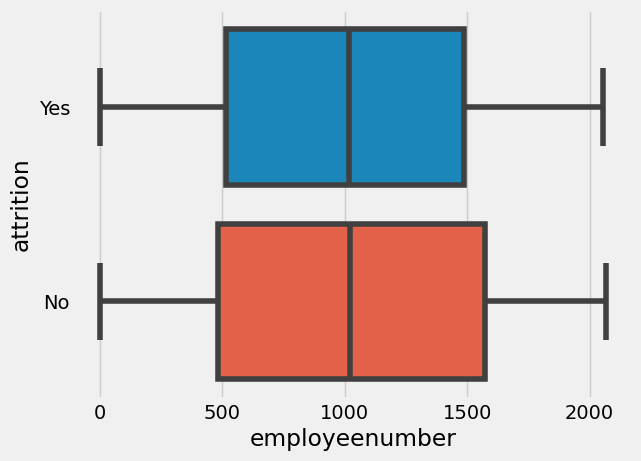

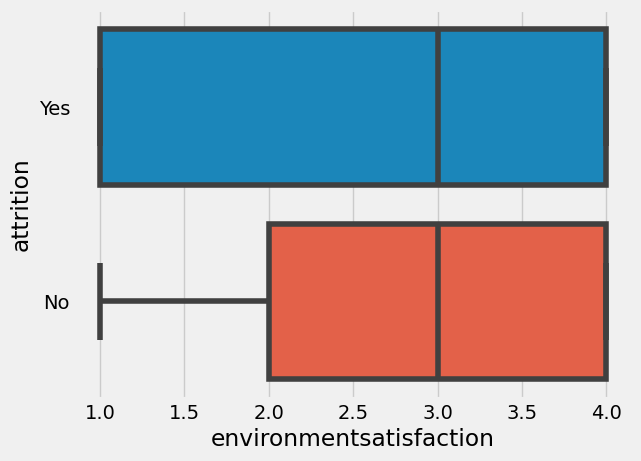

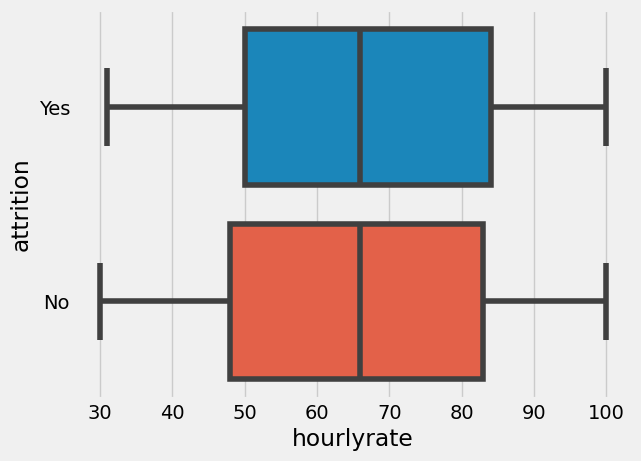

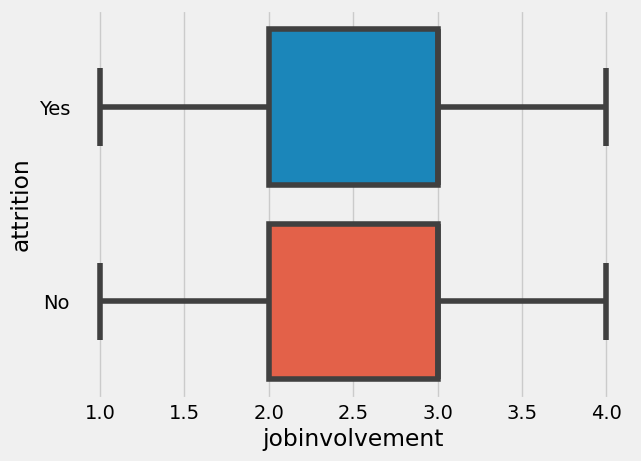

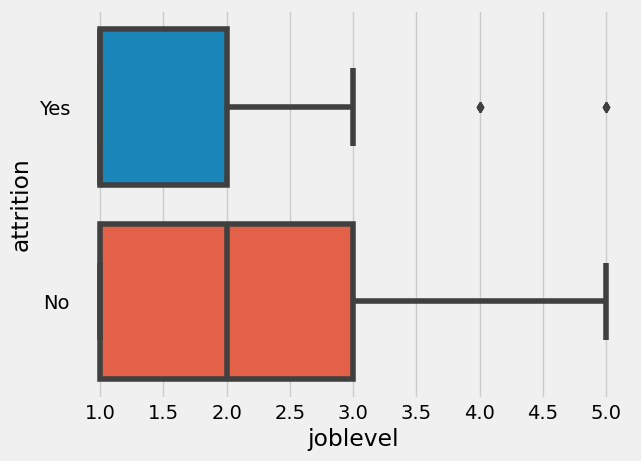

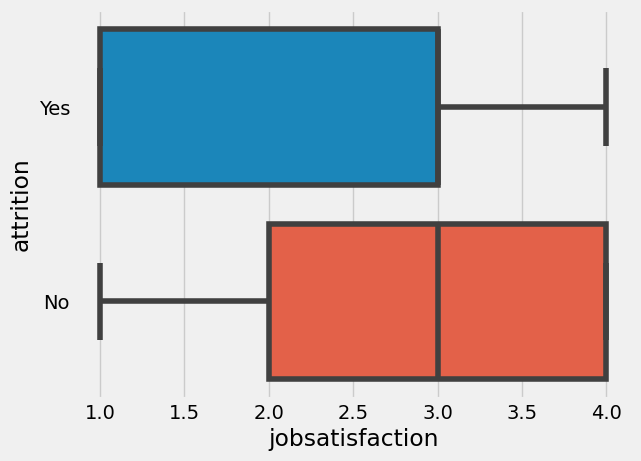

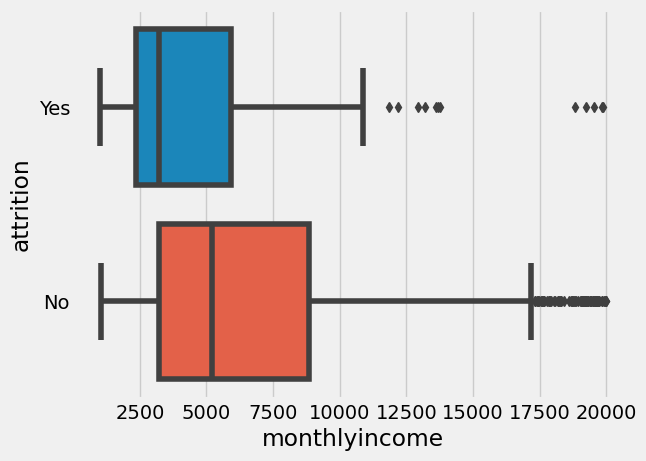

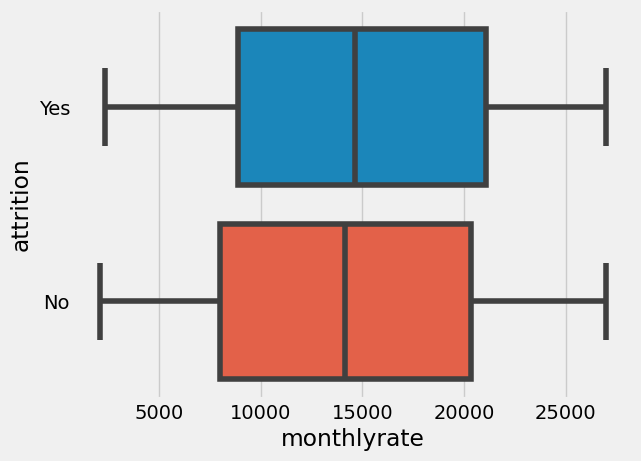

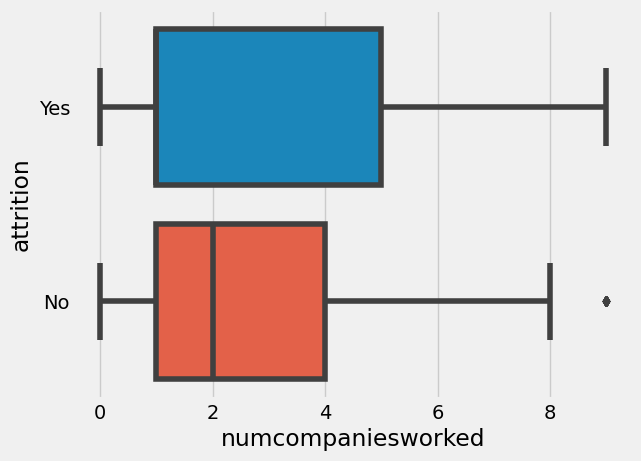

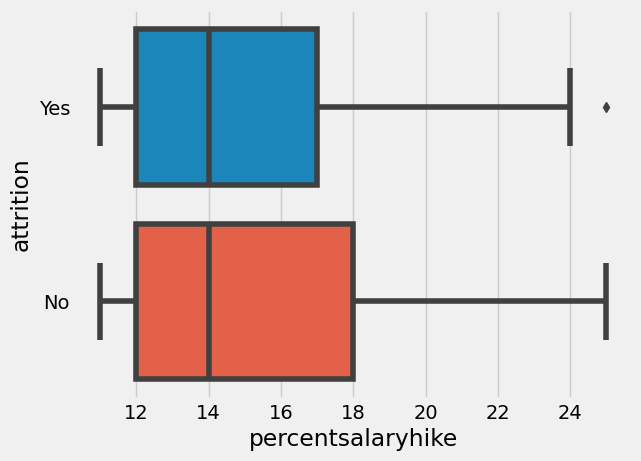

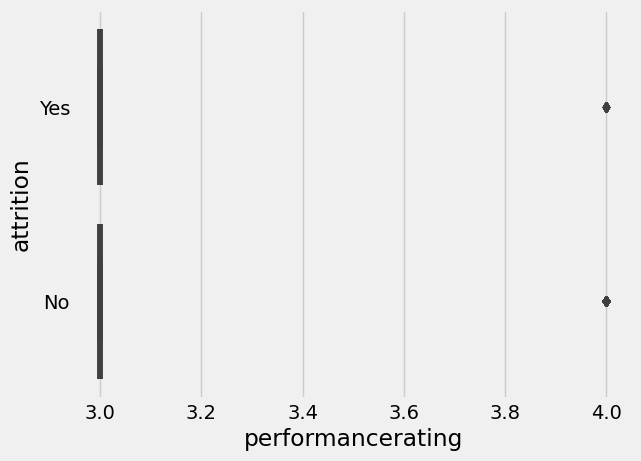

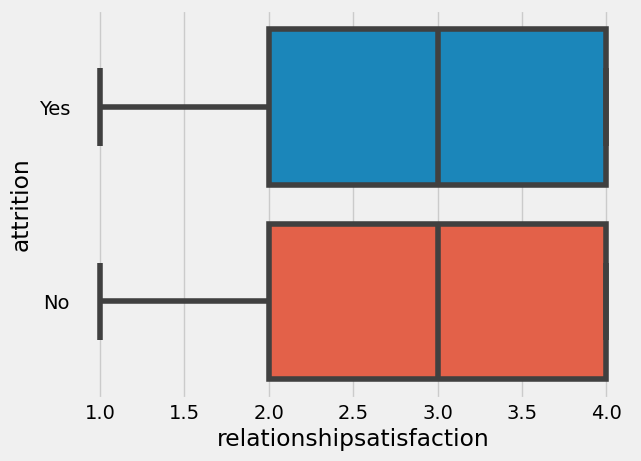

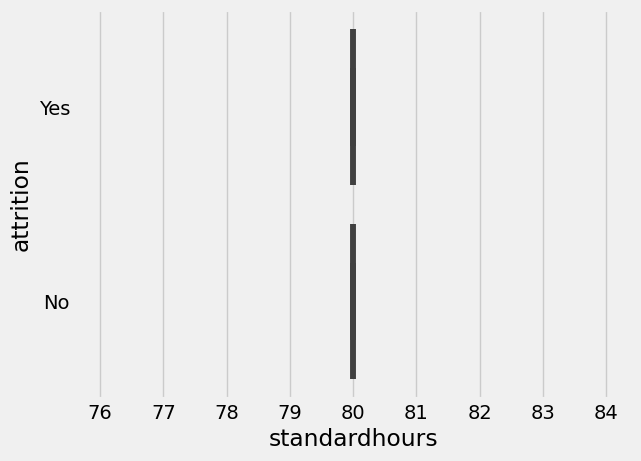

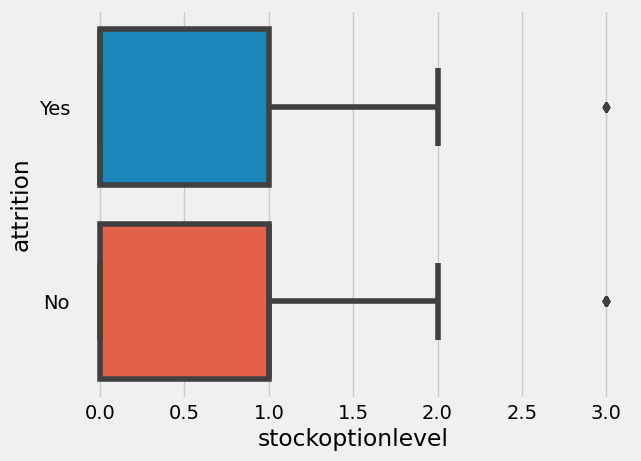

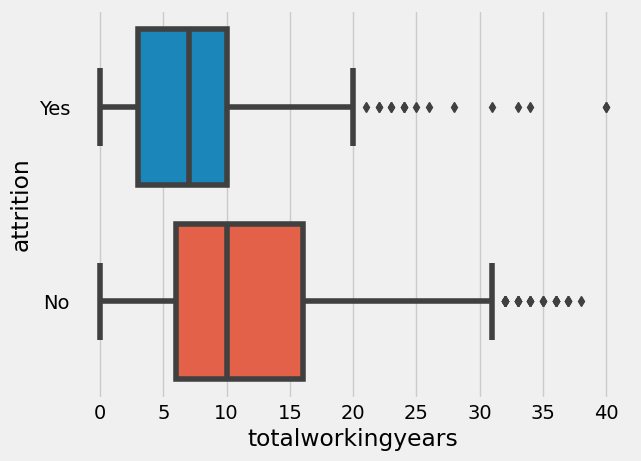

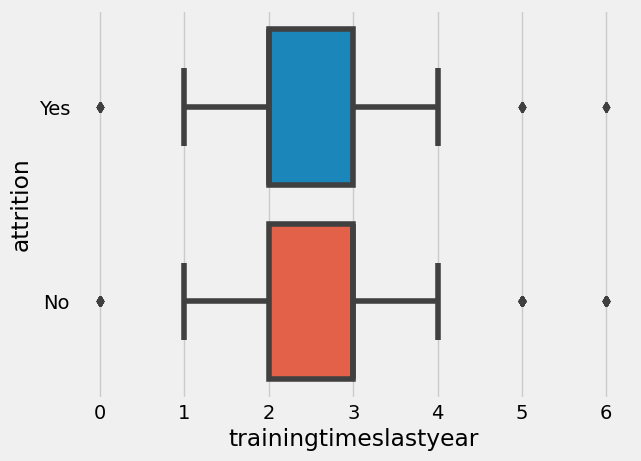

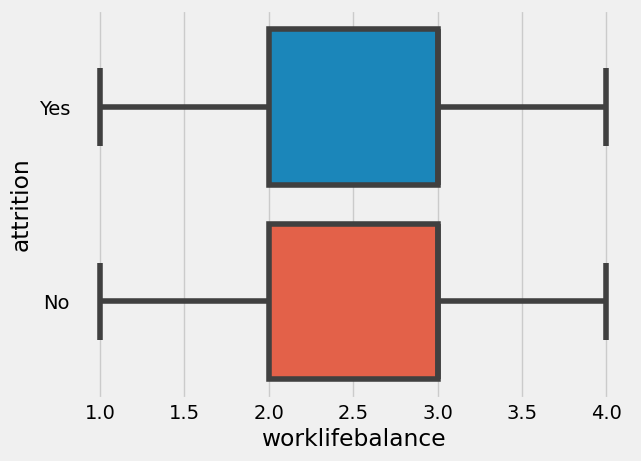

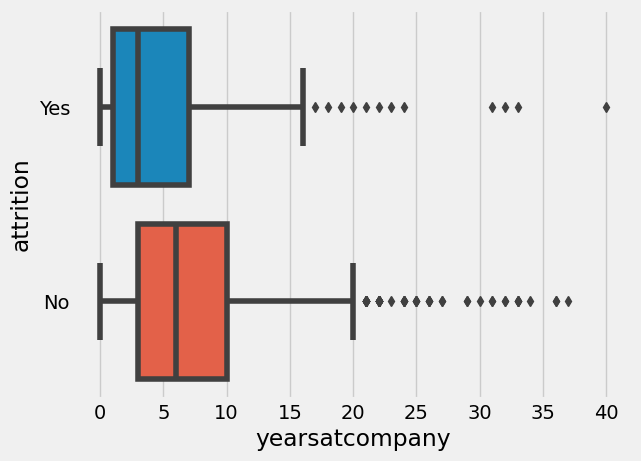

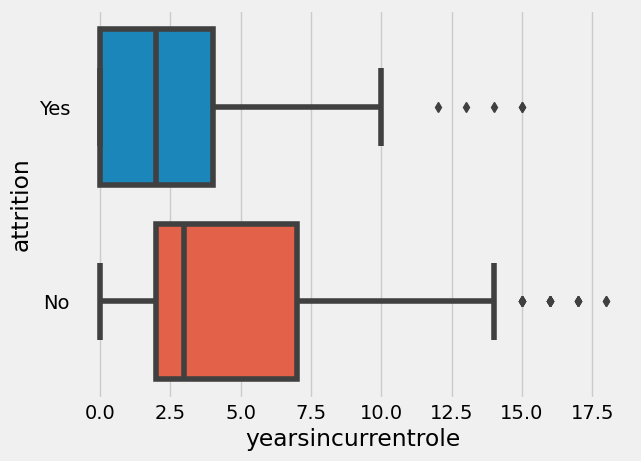

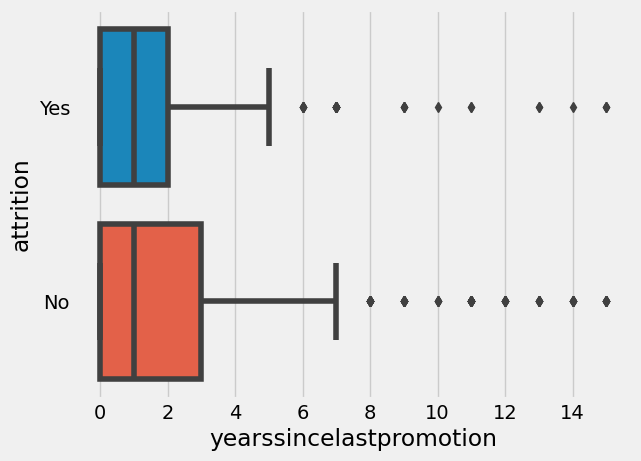

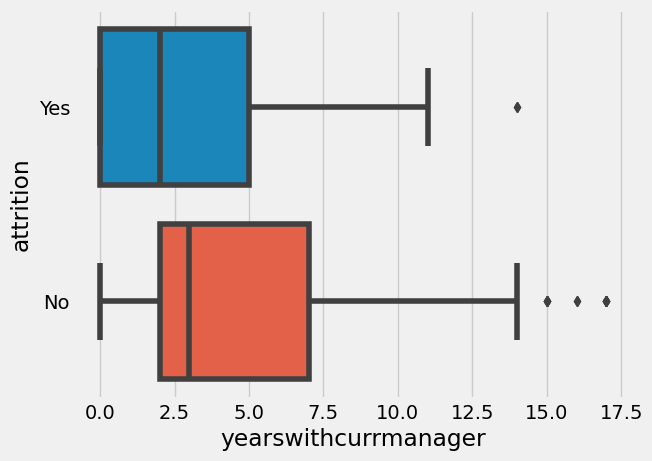

In [10]:
# Check for outliers
# YOUR CODE HERE
for col in num:
  sns.boxplot(data=df,x=col, y='attrition', orient='h')
  plt.show()
# df.boxplot()
# plt.show()

### Handling outliers

**Exercise 4: Use lower bound as 25% and upper bound as 75% to handle the outliers [0.5 Mark]**

In [11]:
# YOUR CODE HERE
def drop_outliers(df, feature, lbound, ubound):
  q1 = df[feature].quantile(0.25)
  q3 = df[feature].quantile(0.75)
  iqr = q3 - q1
  #iqr = 0
  lower_bound = q1 - (1.5*iqr)
  upper_bound = q3 + (1.5*iqr)
  print("df before filtering \t", df.shape)
  df_cleaned = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
  print ("df cleaned \t", df_cleaned.shape)
  return df_cleaned

for col in num: #['monthlyincome']: #num: #['monthlyincome']:
  print(col)
  print(df[col].info())
  # drop_outliers(df, col, 0.25, 0.75)
  df = drop_outliers(df, col, 0.25, 0.75)
  print("\n\n")
print(df.info())
# break

age
<class 'pandas.core.series.Series'>
RangeIndex: 1470 entries, 0 to 1469
Series name: age
Non-Null Count  Dtype
--------------  -----
1470 non-null   int64
dtypes: int64(1)
memory usage: 11.6 KB
None
df before filtering 	 (1470, 35)
df cleaned 	 (1470, 35)



dailyrate
<class 'pandas.core.series.Series'>
Int64Index: 1470 entries, 0 to 1469
Series name: dailyrate
Non-Null Count  Dtype
--------------  -----
1470 non-null   int64
dtypes: int64(1)
memory usage: 23.0 KB
None
df before filtering 	 (1470, 35)
df cleaned 	 (1470, 35)



distancefromhome
<class 'pandas.core.series.Series'>
Int64Index: 1470 entries, 0 to 1469
Series name: distancefromhome
Non-Null Count  Dtype
--------------  -----
1470 non-null   int64
dtypes: int64(1)
memory usage: 23.0 KB
None
df before filtering 	 (1470, 35)
df cleaned 	 (1470, 35)



education
<class 'pandas.core.series.Series'>
Int64Index: 1470 entries, 0 to 1469
Series name: education
Non-Null Count  Dtype
--------------  -----
1470 non-null   int64
dt

(699, 35)


<Axes: >

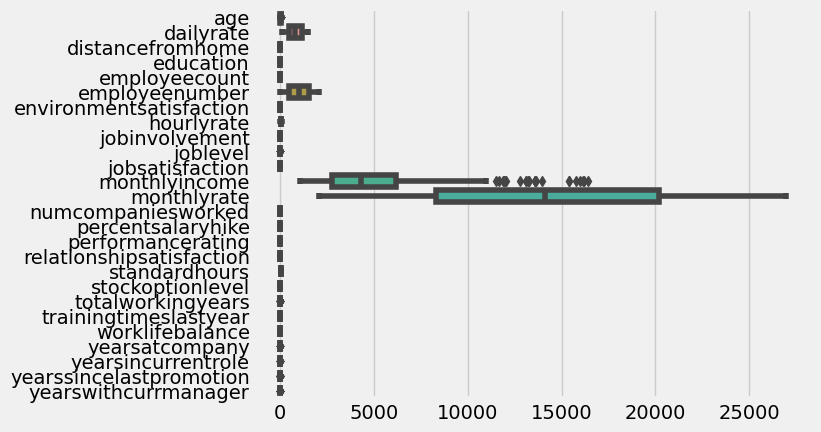

In [12]:
# Recheck for outliers
# YOUR CODE HERE
print(df.shape)
sns.boxplot(df, orient='h')

### Target label imbalance

**Exercise 5: Check if there is an imbalance in target label [0.5 Mark]**

**Hint:** Use value_counts()

In [13]:
# Count of unique values in Attrition column
# YOUR CODE HERE
df['attrition'].value_counts()

No     577
Yes    122
Name: attrition, dtype: int64

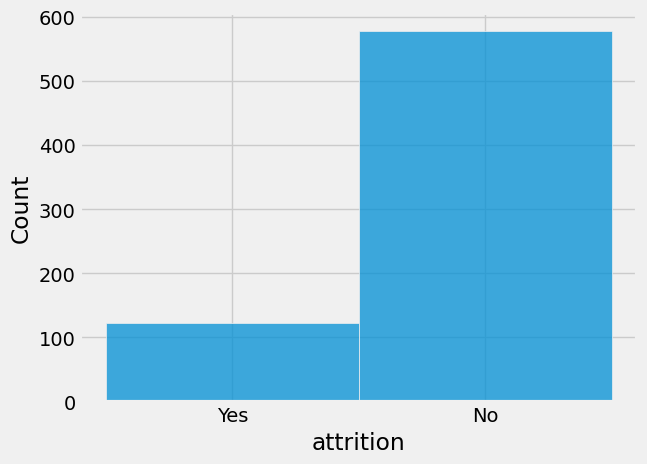

In [14]:
# Plot barplot to visualize balance/imbalance
# YOUR CODE HERE
for col in ['attrition']:#cat:
  data = df[col]
  value_counts = df[col].value_counts()
  sns.histplot(data=df, x=col, discrete=True, bins=len(value_counts))
  plt.show()

If there is any imbalance in the dataset then a few techniques can be utilised (optional):
1. SMOTE
2. Cross Validation
3. Regularizing the model's parameters

###Plot pairplot

**Exercise 6: Visualize the relationships between the predictor variables and the target variable using a pairplot [0.5 Mark]**

**Hint:** Use sns.pairplot

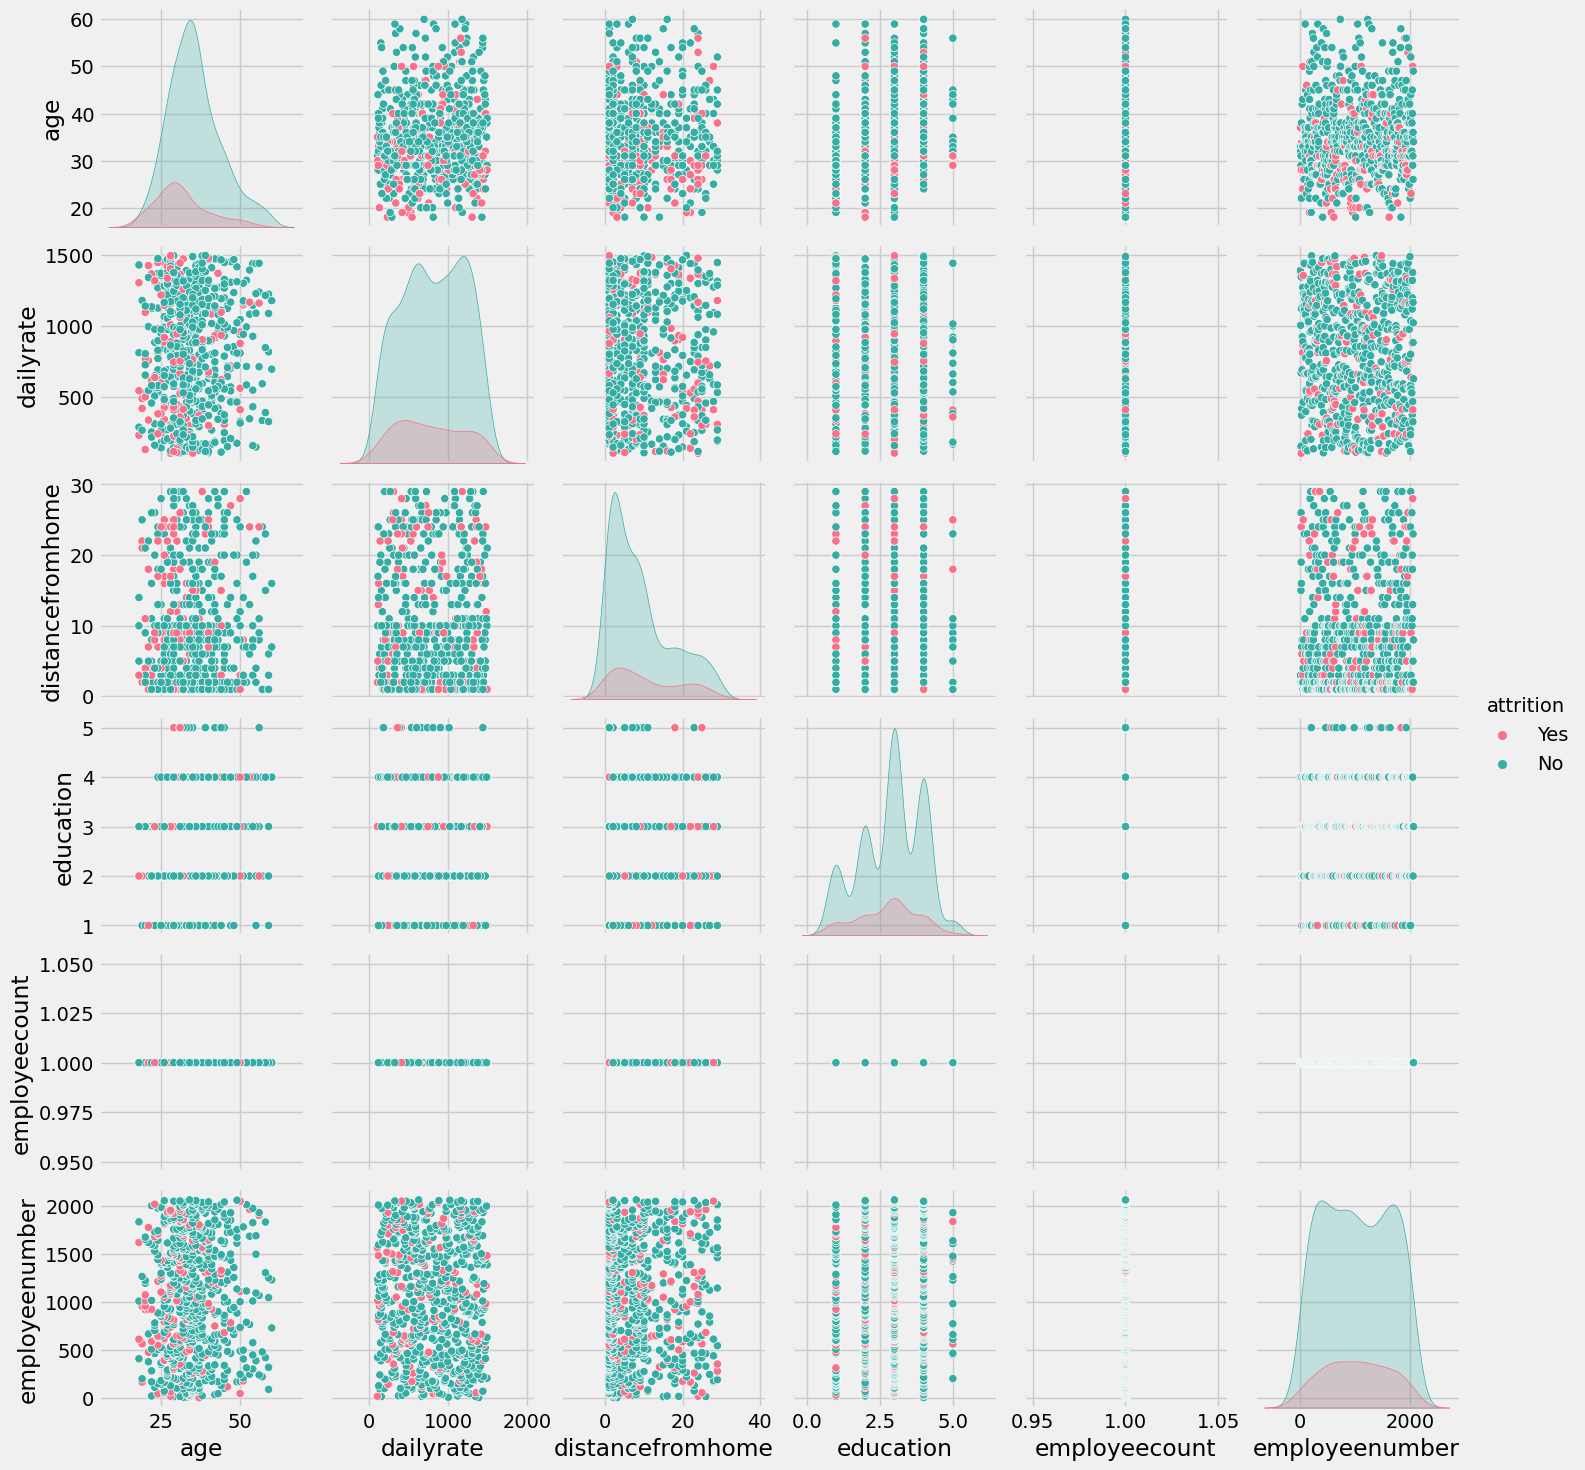

In [15]:
# Visualize a pairplot with relevant features
# YOUR CODE HERE
sns.pairplot(df[df.columns[:10]], hue = 'attrition', diag_kind = 'kde', kind = 'scatter', palette = 'husl')

### Explore Correlation

- Plotting the Heatmap

**Exercise 7: Visualize the correlation among IBM employee attrition numerical features using a heatmap [0.5 Mark]**

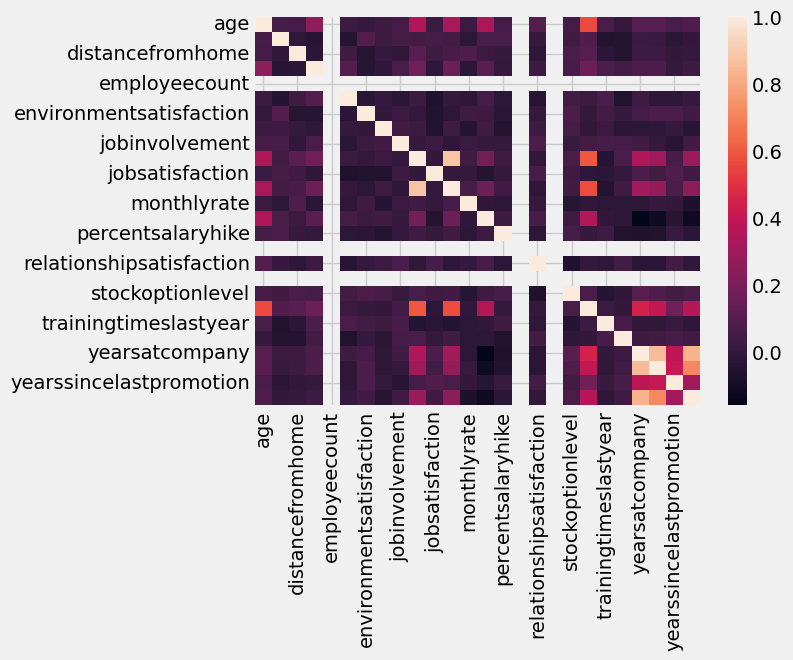

In [16]:
# Visualize heatmap
# YOUR CODE HERE
correlation_matrix = df[num].corr()
sns.heatmap(correlation_matrix, )
plt.show()

Comment on the observations made with the pairplot and heatmap

# Part-B

### Preparing the test feature space
* Remove outliers if any
* Handle the categorical feature if required
* Other processing steps can also be followed.

In [95]:
for col in cat:
  print(col)
  series = df[col]
  series = series.dropna()
  print(series.value_counts())

attrition
No     577
Yes    122
Name: attrition, dtype: int64
businesstravel
Travel_Rarely        498
Travel_Frequently    133
Non-Travel            68
Name: businesstravel, dtype: int64
department
Research & Development    438
Sales                     230
Human Resources            31
Name: department, dtype: int64
educationfield
Life Sciences       289
Medical             191
Marketing            88
Technical Degree     73
Other                44
Human Resources      14
Name: educationfield, dtype: int64
gender
Male      440
Female    259
Name: gender, dtype: int64
jobrole
Sales Executive              169
Research Scientist           159
Laboratory Technician        136
Manufacturing Director        66
Sales Representative          59
Healthcare Representative     59
Human Resources               31
Research Director             15
Manager                        5
Name: jobrole, dtype: int64
maritalstatus
Married     308
Single      256
Divorced    135
Name: maritalstatus, dtype: in

In [1]:
 # Hyperopt for hyperparameter tuning/optimization
!pip install hyperopt

In [2]:
# fmin - the main function for us, it will minimize our functional
# tpe and anneal - optimization approaches
# hp - include different distributions of variables
# Trials - is used for logging
#from hyperopt import fmin, tpe, hp, anneal, Trials

def gb_mse_cv(params, random_state=random_state, cv=kf, X=train_data, y=train_targets):
    # the function gets a set of variable parameters in "param"
    params = {'n_estimators': int(params['n_estimators']),
              'max_depth': int(params['max_depth']),
             'learning_rate': params['learning_rate']}

    # we use this params to create a new LGBM Regressor
    model = LGBMRegressor(random_state=random_state, **params)

    # and then conduct the cross validation with the same folds as before
    score = -cross_val_score(model, X, y, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1).mean()

    return score

Optional:
Use `Hyperopt`, a hyperparameter tuning technique to identify the best set of parameters.

In the notebook, data processing is done separately for different models.
Considering the fact that different models may require data in different format and in turn different processes may be followed to process the data.

If the processing steps followed for the models are same, data processing can also be done once.

## Apply CatBoost

Catboost was released in 2017 by Yandex, showing, by their benchmark to be faster in prediction, better in accuracy, and easier to use for categorical data across a series of GBDT tasks. Additional capabilities of catboost include plotting feature interactions and object (row) importance.

[Here](https://catboost.ai/en/docs/) is the official documentation of CatBoost

### Data Processing for CatBoost

**Exercise 8: Data processing for CatBoost [1 Mark]**
* **Copy the dataframe that was created after removing the outliers**
* **Handle the categorical features if required**
* **Create target column and feature space**

**Hint:** Column containing the information on attrition will be the target column.

In [96]:
from sklearn.preprocessing import OrdinalEncoder
# Copy the data
# YOUR CODE HERE
cb_inp_data = df.copy()
#Simple Mapping for each categorical feature column.
  #cb_inp_data['attrition'] = cb_inp_data['attrition'].map({'Yes':1, 'No':0})
  #cb_inp_data['businesstravel'] = cb_inp_data['businesstravel'].map({'Non-Travel':0,'Travel_Rarely':1,'Travel_Frequently':2})
  #cb_inp_data['department'] = cb_inp_data['department'].map({'Research & Development':0, 'Sales':1, 'Human Resources':2})

#Using OneHotEncoder or OrdinalEncoder?
  # Apply one-hot encoder to each column with categorical data
  #ohe = OneHotEncoder(sparse=False)
  #ColumnTransformer()
  #OH_c = pd.DataFrame(ohe.fit_transform(cat_inp_data[cat]))
  #OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

#Ordinal Encoding
oe = OrdinalEncoder()
cb_inp_data[cat]= oe.fit_transform(cb_inp_data[cat])
cb_inp_data

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
2,37,1.0,2.0,1373,1.0,2,2,4.0,1,4,4,1.0,92,2,1,2.0,3,2.0,2090,2396,6,0.0,1.0,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,1,5,4,0.0,56,3,1,6.0,3,1.0,2909,23159,1,0.0,1.0,11,3,3,80,0,8,3,3,8,7,3,0
5,32,0.0,1.0,1005,1.0,2,2,1.0,1,8,4,1.0,79,3,1,2.0,4,2.0,3068,11864,0,0.0,0.0,13,3,3,80,0,8,2,2,7,7,3,6
11,29,0.0,2.0,153,1.0,15,2,1.0,1,15,4,0.0,49,2,2,2.0,3,2.0,4193,12682,0,0.0,1.0,12,3,4,80,0,10,3,3,9,5,0,8
12,31,0.0,2.0,670,1.0,26,1,1.0,1,16,1,1.0,31,3,1,6.0,3,0.0,2911,15170,1,0.0,0.0,17,3,4,80,1,5,1,2,5,2,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,0.0,0.0,325,1.0,5,3,3.0,1,2057,2,1.0,74,3,2,4.0,1,2.0,9936,3787,0,0.0,0.0,19,3,2,80,0,10,2,3,9,4,1,7
1464,26,0.0,2.0,1167,2.0,5,3,4.0,1,2060,4,0.0,30,2,1,8.0,3,2.0,2966,21378,0,0.0,0.0,18,3,4,80,0,5,2,3,4,2,0,0
1465,36,0.0,1.0,884,1.0,23,2,3.0,1,2061,3,1.0,41,4,2,2.0,4,1.0,2571,12290,4,0.0,0.0,17,3,3,80,1,17,3,3,5,2,0,3
1468,49,0.0,1.0,1023,2.0,2,3,3.0,1,2065,4,1.0,63,2,2,7.0,2,1.0,5390,13243,2,0.0,0.0,14,3,4,80,0,17,3,2,9,6,0,8


In [97]:
# Target Column
# YOUR CODE HERE
target = cb_inp_data['attrition']
target

2       1.0
3       0.0
5       0.0
11      0.0
12      0.0
       ... 
1463    0.0
1464    0.0
1465    0.0
1468    0.0
1469    0.0
Name: attrition, Length: 699, dtype: float64

In [98]:
# Feature Space
# YOUR CODE HERE
features = cb_inp_data.drop('attrition', axis=1)
features

,age,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
2,37,2.0,1373,1.0,2,2,4.0,1,4,4,1.0,92,2,1,2.0,3,2.0,2090,2396,6,0.0,1.0,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1.0,1392,1.0,3,4,1.0,1,5,4,0.0,56,3,1,6.0,3,1.0,2909,23159,1,0.0,1.0,11,3,3,80,0,8,3,3,8,7,3,0
5,32,1.0,1005,1.0,2,2,1.0,1,8,4,1.0,79,3,1,2.0,4,2.0,3068,11864,0,0.0,0.0,13,3,3,80,0,8,2,2,7,7,3,6
11,29,2.0,153,1.0,15,2,1.0,1,15,4,0.0,49,2,2,2.0,3,2.0,4193,12682,0,0.0,1.0,12,3,4,80,0,10,3,3,9,5,0,8
12,31,2.0,670,1.0,26,1,1.0,1,16,1,1.0,31,3,1,6.0,3,0.0,2911,15170,1,0.0,0.0,17,3,4,80,1,5,1,2,5,2,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,0.0,325,1.0,5,3,3.0,1,2057,2,1.0,74,3,2,4.0,1,2.0,9936,3787,0,0.0,0.0,19,3,2,80,0,10,2,3,9,4,1,7
1464,26,2.0,1167,2.0,5,3,4.0,1,2060,4,0.0,30,2,1,8.0,3,2.0,2966,21378,0,0.0,0.0,18,3,4,80,0,5,2,3,4,2,0,0
1465,36,1.0,884,1.0,23,2,3.0,1,2061,3,1.0,41,4,2,2.0,4,1.0,2571,12290,4,0.0,0.0,17,3,3,80,1,17,3,3,5,2,0,3
1468,49,1.0,1023,2.0,2,3,3.0,1,2065,4,1.0,63,2,2,7.0,2,1.0,5390,13243,2,0.0,0.0,14,3,4,80,0,17,3,2,9,6,0,8


### Model Definition

**Exercise 9: Define, train the model and display the results [2 Mark]**

**Hint:**
* Use CatBoostClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model. Refer [here](https://catboost.ai/en/docs/concepts/speed-up-training) to see some ways to speedup CatBoost training.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [99]:
# Create the training, test data
x_train, x_test, y_train, y_test = train_test_split(features, target, stratify=target,random_state=32)
print(y_train.shape)
print(x_train.shape)

(524,)
(524, 34)


In [100]:
# Create CatBoost model
# YOUR CODE HERE
#cb = CatBoostClassifier()
# cb = CatBoostClassifier(n_estimators=1244,  max_depth=9, learning_rate=0.99, subsample=0.7, colsample_bylevel=0.8, random_state=0)
cb = CatBoostClassifier(n_estimators=1000,  max_depth=9, learning_rate=0.99, random_state=5)




In [101]:
# Model training
# YOUR CODE HERE
cb.fit(x_train, y_train)
#xb.fit(x_train, y_train)
print(cb)
y_pred = cb.predict(x_test)
#xb_y_pred = xb.predict(x_test)


0:	learn: 0.3534743	total: 15.2ms	remaining: 15.2s
1:	learn: 0.2319465	total: 24.7ms	remaining: 12.3s
2:	learn: 0.1338247	total: 33.8ms	remaining: 11.2s
3:	learn: 0.0985730	total: 42.9ms	remaining: 10.7s
4:	learn: 0.0778117	total: 52ms	remaining: 10.3s
5:	learn: 0.0565652	total: 61.6ms	remaining: 10.2s
6:	learn: 0.0442212	total: 70.6ms	remaining: 10s
7:	learn: 0.0347602	total: 80.7ms	remaining: 10s
8:	learn: 0.0287959	total: 89.6ms	remaining: 9.87s
9:	learn: 0.0238764	total: 99.5ms	remaining: 9.85s
10:	learn: 0.0203255	total: 108ms	remaining: 9.73s
11:	learn: 0.0177386	total: 117ms	remaining: 9.64s
12:	learn: 0.0159385	total: 126ms	remaining: 9.58s
13:	learn: 0.0147532	total: 135ms	remaining: 9.52s
14:	learn: 0.0132300	total: 144ms	remaining: 9.47s
15:	learn: 0.0119999	total: 153ms	remaining: 9.43s
16:	learn: 0.0107318	total: 162ms	remaining: 9.39s
17:	learn: 0.0097942	total: 171ms	remaining: 9.33s
18:	learn: 0.0091416	total: 180ms	remaining: 9.3s
19:	learn: 0.0084560	total: 189ms	rema

### Model performance

In [102]:
# Model performance on all sets
# YOUR CODE HERE
#cb.score()
#roc_auc_score, accuracy_score, confusion_matrix, f1_score
#roc_auc_score(cb)

cb_roc_auc = roc_auc_score(y_test, y_pred)
cb_accuracy = accuracy_score(y_test, y_pred)
cb_confusion = confusion_matrix(y_test, y_pred)
cb_f1_score = f1_score(y_test, y_pred)
print("AUC Score", cb_roc_auc)
print("Accuracy Score", cb_accuracy)
print("Confusion Matrix \n", cb_confusion)
print("F1 Score", cb_f1_score)

# Model performance on all sets
# YOUR CODE HERE
# xb_roc_auc = roc_auc_score(y_test, xb_y_pred)
# xb_accuracy = accuracy_score(y_test, xb_y_pred)
# xb_confusion = confusion_matrix(y_test, xb_y_pred)
# xb_f1_score = f1_score(y_test, xb_y_pred)
#print("AUC Score", xb_roc_auc)
#print("Accuracy Score", xb_accuracy)
# print("Confusion Matrix \n", xb_confusion)
# print("F1 Score", xb_f1_score)


AUC Score 0.6255600358422939
Accuracy Score 0.8628571428571429
Confusion Matrix 
 [[143   1]
 [ 23   8]]
F1 Score 0.39999999999999997


## Apply XGBoost

XGBoost is a workhorse gradient boosted decision tree algorithm. Its been around since 2014 and has come to dominate the Kaggle and data science community. XGB introduced gradient boosting where new models are fit to the residuals of prior models and then added together, using a gradient descent algorithm to minimize the loss.

Read [here](https://xgboost.readthedocs.io/en/stable/parameter.html) on XGBoost parameters.

Refer [here](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier) for the official documentation of XGBoost classifier.

### Data Processing for XGBoost


**Exercise 10: Data Processing for XGBoost [1 Mark]**
* **Copy the dataframe after the outliers were removed.**
* **Handle the categorical features if required**
* **Create target column and feature space**

In [103]:
#
# Copy the data
# YOUR CODE HERE
xb_input = df.copy()
xb_input


,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,15,4,Female,49,2,2,Laboratory Technician,3,Single,4193,12682,0,Y,Yes,12,3,4,80,0,10,3,3,9,5,0,8
12,31,No,Travel_Rarely,670,Research & Development,26,1,Life Sciences,1,16,1,Male,31,3,1,Research Scientist,3,Divorced,2911,15170,1,Y,No,17,3,4,80,1,5,1,2,5,2,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,2,Male,74,3,2,Manufacturing Director,1,Single,9936,3787,0,Y,No,19,3,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,4,Female,30,2,1,Sales Representative,3,Single,2966,21378,0,Y,No,18,3,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


**Hint:** Use pd.get_dummies

In [80]:
# Handling categorical features
# Concat the dummy variables to actual dataframe and remove initial categorical columns
# YOUR CODE HERE
# Reduces Scores
xb_xfrm_drop = pd.get_dummies(xb_input, columns=cat, drop_first=True)
xb_xfrm_drop.shape
xb_xfrm_drop


,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,attrition_Yes,businesstravel_Travel_Frequently,businesstravel_Travel_Rarely,department_Research & Development,department_Sales,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Male,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Married,maritalstatus_Single,overtime_Yes
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
5,32,1005,2,2,1,8,4,79,3,1,4,3068,11864,0,13,3,3,80,0,8,2,2,7,7,3,6,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
11,29,153,15,2,1,15,4,49,2,2,3,4193,12682,0,12,3,4,80,0,10,3,3,9,5,0,8,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
12,31,670,26,1,1,16,1,31,3,1,3,2911,15170,1,17,3,4,80,1,5,1,2,5,2,4,3,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,325,5,3,1,2057,2,74,3,2,1,9936,3787,0,19,3,2,80,0,10,2,3,9,4,1,7,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1464,26,1167,5,3,1,2060,4,30,2,1,3,2966,21378,0,18,3,4,80,0,5,2,3,4,2,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1465,36,884,23,2,1,2061,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1468,49,1023,2,3,1,2065,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [94]:
# Handling categorical features
# Concat the dummy variables to actual dataframe and remove initial categorical columns
# YOUR CODE HERE
# Gives Better Scores (RUN)
xb_xfrm = pd.get_dummies(xb_input, columns=cat, drop_first=False)
print(xb_xfrm.shape)
xb_xfrm

(699, 57)


,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,attrition_No,attrition_Yes,businesstravel_Non-Travel,businesstravel_Travel_Frequently,businesstravel_Travel_Rarely,department_Human Resources,department_Research & Development,department_Sales,educationfield_Human Resources,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Female,gender_Male,jobrole_Healthcare Representative,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single,over18_Y,overtime_No,overtime_Yes
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
5,32,1005,2,2,1,8,4,79,3,1,4,3068,11864,0,13,3,3,80,0,8,2,2,7,7,3,6,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0
11,29,153,15,2,1,15,4,49,2,2,3,4193,12682,0,12,3,4,80,0,10,3,3,9,5,0,8,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
12,31,670,26,1,1,16,1,31,3,1,3,2911,15170,1,17,3,4,80,1,5,1,2,5,2,4,3,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,325,5,3,1,2057,2,74,3,2,1,9936,3787,0,19,3,2,80,0,10,2,3,9,4,1,7,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0
1464,26,1167,5,3,1,2060,4,30,2,1,3,2966,21378,0,18,3,4,80,0,5,2,3,4,2,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0
1465,36,884,23,2,1,2061,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0
1468,49,1023,2,3,1,2065,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0


When creating the dummy variables, the name of attrition column was changed, rename to 'attrition' again.

**Hint:** Use .rename

In [89]:
# Rename target column
# YOUR CODE HERE
# Gives Higher Scores (RUN)
xb_xfrm_drop_yes = xb_xfrm.drop(['attrition_Yes'], axis=1)
# Rename target column
xb_xfrm = xb_xfrm_drop_yes.rename(columns={"attrition_No": "attrition"})
xb_xfrm

,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,attrition,businesstravel_Non-Travel,businesstravel_Travel_Frequently,businesstravel_Travel_Rarely,department_Human Resources,department_Research & Development,department_Sales,educationfield_Human Resources,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Female,gender_Male,jobrole_Healthcare Representative,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single,over18_Y,overtime_No,overtime_Yes
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
5,32,1005,2,2,1,8,4,79,3,1,4,3068,11864,0,13,3,3,80,0,8,2,2,7,7,3,6,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0
11,29,153,15,2,1,15,4,49,2,2,3,4193,12682,0,12,3,4,80,0,10,3,3,9,5,0,8,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
12,31,670,26,1,1,16,1,31,3,1,3,2911,15170,1,17,3,4,80,1,5,1,2,5,2,4,3,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,325,5,3,1,2057,2,74,3,2,1,9936,3787,0,19,3,2,80,0,10,2,3,9,4,1,7,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0
1464,26,1167,5,3,1,2060,4,30,2,1,3,2966,21378,0,18,3,4,80,0,5,2,3,4,2,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0
1465,36,884,23,2,1,2061,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0
1468,49,1023,2,3,1,2065,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0


In [56]:
# Gives much less score (Probably because of the imbalance in data)
xb_xfrm_drop_no = xb_xfrm.drop(['attrition_No'], axis=1)
xb_xfrm = xb_xfrm_drop_no.rename(columns={"attrition_Yes": "attrition"})
xb_xfrm
#xb_xfrm_drop_no


,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,attrition_Yes,businesstravel_Non-Travel,businesstravel_Travel_Frequently,businesstravel_Travel_Rarely,department_Human Resources,department_Research & Development,department_Sales,educationfield_Human Resources,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Female,gender_Male,jobrole_Healthcare Representative,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single,over18_Y,overtime_No,overtime_Yes
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
5,32,1005,2,2,1,8,4,79,3,1,4,3068,11864,0,13,3,3,80,0,8,2,2,7,7,3,6,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0
11,29,153,15,2,1,15,4,49,2,2,3,4193,12682,0,12,3,4,80,0,10,3,3,9,5,0,8,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
12,31,670,26,1,1,16,1,31,3,1,3,2911,15170,1,17,3,4,80,1,5,1,2,5,2,4,3,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,325,5,3,1,2057,2,74,3,2,1,9936,3787,0,19,3,2,80,0,10,2,3,9,4,1,7,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0
1464,26,1167,5,3,1,2060,4,30,2,1,3,2966,21378,0,18,3,4,80,0,5,2,3,4,2,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0
1465,36,884,23,2,1,2061,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0
1468,49,1023,2,3,1,2065,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0


In [90]:
# Targer label
# YOUR CODE HERE
target = xb_xfrm['attrition']
# Feature Space
# YOUR CODE HERE
features = xb_xfrm.drop('attrition', axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, target, stratify=target,random_state=32)
print(y_train.shape)
print(x_train.shape)
features

(524,)
(524, 55)


,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,businesstravel_Non-Travel,businesstravel_Travel_Frequently,businesstravel_Travel_Rarely,department_Human Resources,department_Research & Development,department_Sales,educationfield_Human Resources,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Female,gender_Male,jobrole_Healthcare Representative,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single,over18_Y,overtime_No,overtime_Yes
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
5,32,1005,2,2,1,8,4,79,3,1,4,3068,11864,0,13,3,3,80,0,8,2,2,7,7,3,6,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0
11,29,153,15,2,1,15,4,49,2,2,3,4193,12682,0,12,3,4,80,0,10,3,3,9,5,0,8,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
12,31,670,26,1,1,16,1,31,3,1,3,2911,15170,1,17,3,4,80,1,5,1,2,5,2,4,3,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,325,5,3,1,2057,2,74,3,2,1,9936,3787,0,19,3,2,80,0,10,2,3,9,4,1,7,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0
1464,26,1167,5,3,1,2060,4,30,2,1,3,2966,21378,0,18,3,4,80,0,5,2,3,4,2,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0
1465,36,884,23,2,1,2061,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0
1468,49,1023,2,3,1,2065,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0


### Model Definition

**Exercise 11: Define, train the model and display the results [2 Mark]**

**Hint:**
* Use XGBClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [91]:
# Create XGBoost classifier model
# YOUR CODE HERE
xb = XGBClassifier(n_estimators=1000,  max_depth=9, learning_rate=0.99, random_state=5)


In [92]:
# Model training
# YOUR CODE HERE
xb.fit(x_train, y_train)
print(xb)
y_pred = xb.predict(x_test)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.99, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=5, ...)


### Model Performance

In [93]:
# Model performance on all sets
# YOUR CODE HERE
xb_roc_auc = roc_auc_score(y_test, y_pred)
xb_accuracy = accuracy_score(y_test, y_pred)
xb_confusion = confusion_matrix(y_test, y_pred)
xb_f1_score = f1_score(y_test, y_pred)
print("AUC Score", xb_roc_auc)
print("Accuracy Score", xb_accuracy)
print("Confusion Matrix \n", xb_confusion)
print("F1 Score", xb_f1_score)


AUC Score 0.6069668458781362
Accuracy Score 0.8114285714285714
Confusion Matrix 
 [[  9  22]
 [ 11 133]]
F1 Score 0.8896321070234114


## Apply LightGBM (Optional)

LightGBM is an open-source GBDT framework created by Microsoft as a fast and scalable alternative to XGB and GBM. By default LightGBM will train a Gradient Boosted Decision Tree (GBDT), but it also supports random forests, Dropouts meet Multiple Additive Regression Trees (DART), and Gradient Based One-Side Sampling (Goss).

To know more about LightGBM parameters, refer [here](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm.LGBMClassifier).

### Feature Engineering for LightGBM

In [ ]:
## Following the same procedure as followed in XGBoost

# Copy the dataframe
# YOUR CODE HERE

# Handling categorical features
# YOUR CODE HERE

# Concat the dummy variables to actual dataframe and remove initial categorical columns
# YOUR CODE HERE

# Rename target column
# YOUR CODE HERE

# Features Space
# YOUR CODE HERE

# Target Label
# YOUR CODE HERE

### Model Definition

**Hint:**
* Use LGBMClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [75]:
# Create LightGBM classifier model
# YOUR CODE HERE
lgbm = LGBMClassifier()

In [76]:
# Model training
# YOUR CODE HERE
lgbm.fit(x_train, y_train)
print(lgbm)
y_pred = lgbm.predict(x_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 433, number of negative: 91
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1024
[LightGBM] [Info] Number of data points in the train set: 524, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.826336 -> initscore=1.559878
[LightGBM] [Info] Start training from score 1.559878
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

### Model performance

In [77]:
# Model performance on all sets
# YOUR CODE HERE
# YOUR CODE HERE
lg_roc_auc = roc_auc_score(y_test, y_pred)
lg_accuracy = accuracy_score(y_test, y_pred)
lg_confusion = confusion_matrix(y_test, y_pred)
lg_f1_score = f1_score(y_test, y_pred)
print("AUC Score", lg_roc_auc)
print("Accuracy Score", lg_accuracy)
print("Confusion Matrix \n", lg_confusion)
print("F1 Score", lg_f1_score)

AUC Score 0.6186155913978495
Accuracy Score 0.8514285714285714
Confusion Matrix 
 [[  8  23]
 [  3 141]]
F1 Score 0.9155844155844156


## Results

**Exercise 12: Create a dataframe of XGBoost results and CatBoost results and display them [0.5 Mark]**

**Hint:** Use pd.DataFrame

In [78]:
# Create a dataframe for computed metrics for different models
# YOUR CODE HERE
score_data = {'AUC' : [cb_roc_auc, xb_roc_auc, lg_roc_auc],
              'Accuracy' : [cb_accuracy, xb_accuracy, lg_accuracy],
              'Confusion Matrix': [cb_confusion, xb_confusion, lg_confusion],
              'F1': [cb_f1_score, xb_f1_score, lg_f1_score]}

score_sum = pd.DataFrame(score_data, index = ['CatBoost',
                                              'XGBoost',
                                              'LightGBM'])
score_sum

,AUC,Accuracy,Confusion Matrix,F1
CatBoost,0.625560,0.862857,"[[143, 1], [23, 8]]",0.400000
XGBoost,0.606967,0.811429,"[[9, 22], [11, 133]]",0.889632
LightGBM,0.618616,0.851429,"[[8, 23], [3, 141]]",0.915584


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(score_sum, *['AUC'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(score_sum, *['Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(score_sum, *['F1'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(score_sum, *['AUC'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(score_sum, *['Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(score_sum, *['F1'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(score_sum, *[[['AUC', 'Accuracy'], ['Accuracy', 'F1']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(score_sum, *['F1', 'AUC', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(score_sum, *['F1', 'Accuracy', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(score_sum, *['F1', 'count()', None], **{})
chart

Reference reading:
1. https://machinelearningmastery.com/xgboost-for-imbalanced-classification/